In [1]:
#This code imports necessary libraries for data analysis and visualization, suppresses warnings, and imports preprocessing tools from scikit-learn.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

In [2]:
#reading csv file
df = pd.read_csv("email_classification.csv")

In [3]:
#shows first five columns
df.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


In [4]:
#shows last five columns
df.tail()

,email,label
174,We're pleased to inform you that your refund h...,ham
175,Get rich quick! Invest in our revolutionary ne...,spam
176,Your free trial period is ending soon. Upgrade...,ham
177,Your order is on its way! Track your shipment ...,ham
178,Limited-time offer! Get 50% off on all purchas...,spam


In [5]:
#Displays the count of missing values for each column in the DataFrame
df.isnull().sum()

email    0
label    0
dtype: int64

In [6]:
# check for duplicate values
df.duplicated().sum()

29

In [7]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
#checking for statistical measures of columns
df.describe()

,email,label
count,150,150
unique,150,2
top,Upgrade to our premium plan for exclusive acce...,ham
freq,1,100


In [10]:
#shows a random single row
df.sample()

,email,label
53,Upgrade to our premium membership for exclusiv...,ham


In [11]:
df.shape

(150, 2)

In [12]:
#Overview of the DataFrame's structure and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   150 non-null    object
 1   label   150 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


In [13]:
#counting 'target' column
df['label'].value_counts()

label
ham     100
spam     50
Name: count, dtype: int64

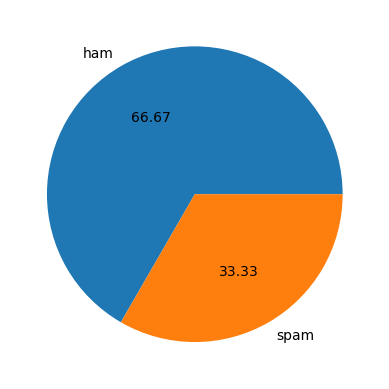

In [14]:
#pie graph
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['label'] = encoder.fit_transform(df['label'])
df.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,0
1,Happy holidays from our team! Wishing you joy ...,0
2,We're hiring! Check out our career opportuniti...,0
3,Your Amazon account has been locked. Click her...,1
4,Your opinion matters! Take our survey and help...,0


In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Dawood
[nltk_data]     Mehmood\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['email'].apply(len)
df.head()

,email,label,num_characters
0,Upgrade to our premium plan for exclusive acce...,0,81
1,Happy holidays from our team! Wishing you joy ...,0,73
2,We're hiring! Check out our career opportuniti...,0,75
3,Your Amazon account has been locked. Click her...,1,83
4,Your opinion matters! Take our survey and help...,0,74


In [20]:
df['num_words'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,email,label,num_characters,num_words
0,Upgrade to our premium plan for exclusive acce...,0,81,14
1,Happy holidays from our team! Wishing you joy ...,0,73,14
2,We're hiring! Check out our career opportuniti...,0,75,15
3,Your Amazon account has been locked. Click her...,1,83,15
4,Your opinion matters! Take our survey and help...,0,74,14


In [21]:
df['num_sentences'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,email,label,num_characters,num_words,num_sentences
0,Upgrade to our premium plan for exclusive acce...,0,81,14,1
1,Happy holidays from our team! Wishing you joy ...,0,73,14,2
2,We're hiring! Check out our career opportuniti...,0,75,15,2
3,Your Amazon account has been locked. Click her...,1,83,15,2
4,Your opinion matters! Take our survey and help...,0,74,14,2


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,150.000000,150.000000,150.000000
mean,77.393333,15.553333,2.053333
std,10.537817,2.141118,0.380509
min,52.000000,11.000000,1.000000
25%,69.250000,14.000000,2.000000
50%,78.000000,15.000000,2.000000
75%,85.000000,17.000000,2.000000
max,107.000000,22.000000,3.000000


In [23]:
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,100.000000,100.000000,100.000000
mean,78.680000,15.740000,1.980000
std,9.073082,2.130206,0.317185
min,52.000000,11.000000,1.000000
25%,73.000000,14.000000,2.000000
50%,79.000000,15.000000,2.000000
75%,85.000000,17.000000,2.000000
max,98.000000,22.000000,3.000000


In [24]:
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,50.000000,50.000000,50.000000
mean,74.820000,15.180000,2.200000
std,12.696922,2.135129,0.451754
min,56.000000,12.000000,1.000000
25%,64.500000,14.000000,2.000000
50%,73.000000,15.000000,2.000000
75%,83.750000,16.000000,2.000000
max,107.000000,21.000000,3.000000


<Axes: xlabel='num_characters', ylabel='Count'>

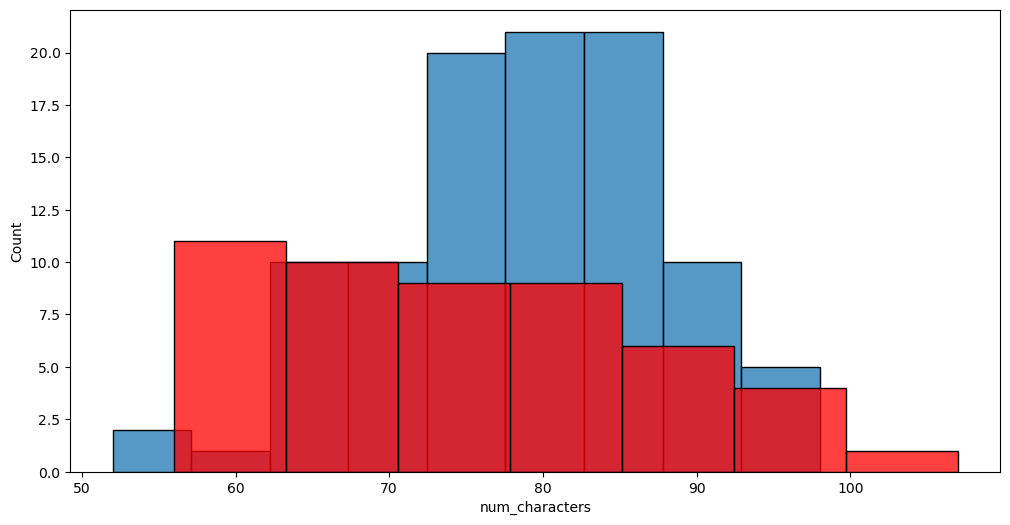

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

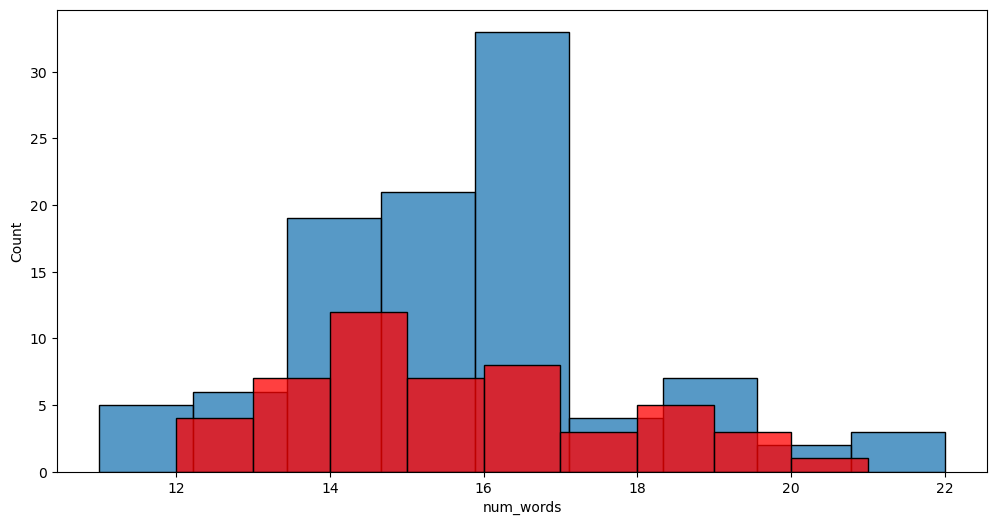

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

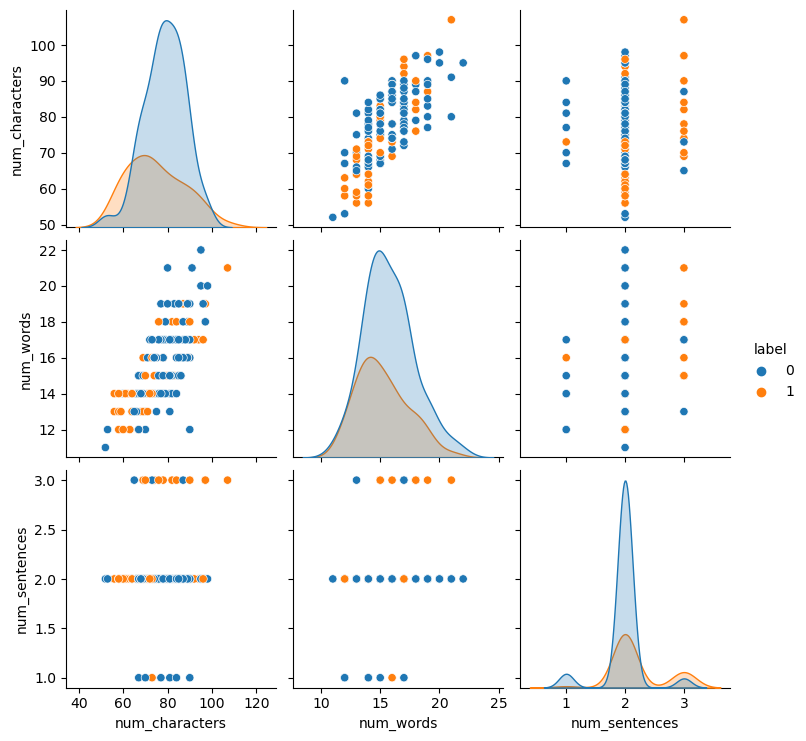

In [27]:
sns.pairplot(df,hue='label')

In [28]:
#calculating the correlation matrix for selected columns
df_corr = df[['label', 'num_characters', 'num_words', 'num_sentences']].dropna().corr()

<Axes: >

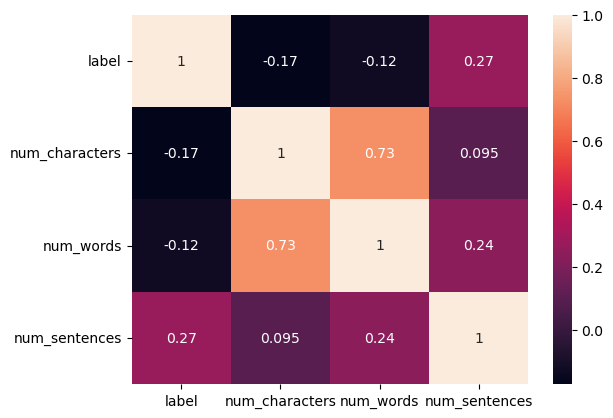

In [29]:
sns.heatmap(df_corr, annot=True)

array([[<Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'num_characters'}>],
       [<Axes: title={'center': 'num_words'}>,
        <Axes: title={'center': 'num_sentences'}>]], dtype=object)

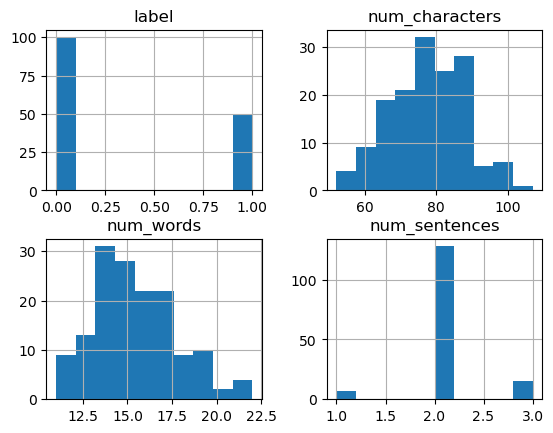

In [30]:
df.hist()

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = word_tokenize(text)
    
    # Filter out non-alphanumeric characters
    y = [i for i in text if i.isalnum()]
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    y = [i for i in y if i not in stop_words and i not in string.punctuation]
    
    # Stem the words
    ps = PorterStemmer()
    y = [ps.stem(i) for i in y]
    
    # Join the stemmed words back into a string
    return " ".join(y)


In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Dawood
[nltk_data]     Mehmood\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [34]:
df['email'][10]

"Don't miss out on our special offer! Sign up now and get a discount on your first purchase."

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [36]:
df['transformed_text'] = df['email'].apply(transform_text)
df.head()

,email,label,num_characters,num_words,num_sentences,transformed_text
0,Upgrade to our premium plan for exclusive acce...,0,81,14,1,upgrad premium plan exclus access premium cont...
1,Happy holidays from our team! Wishing you joy ...,0,73,14,2,happi holiday team wish joy prosper season
2,We're hiring! Check out our career opportuniti...,0,75,15,2,hire check career opportun join dynam team
3,Your Amazon account has been locked. Click her...,1,83,15,2,amazon account lock click verifi account inform
4,Your opinion matters! Take our survey and help...,0,74,14,2,opinion matter take survey help us enhanc experi


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

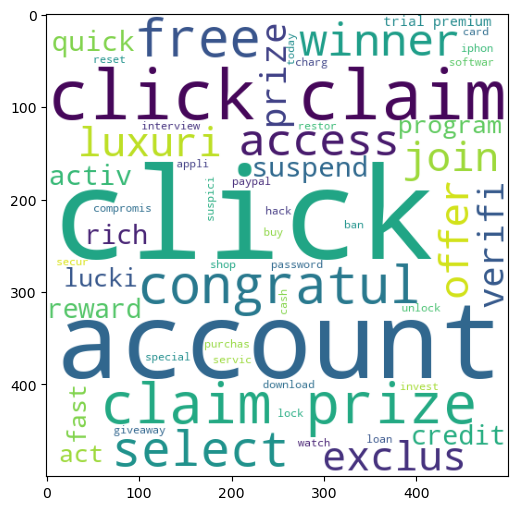

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

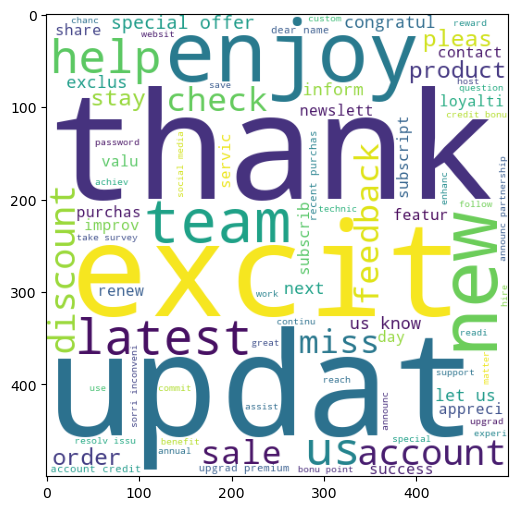

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [42]:
df.head()

,email,label,num_characters,num_words,num_sentences,transformed_text
0,Upgrade to our premium plan for exclusive acce...,0,81,14,1,upgrad premium plan exclus access premium cont...
1,Happy holidays from our team! Wishing you joy ...,0,73,14,2,happi holiday team wish joy prosper season
2,We're hiring! Check out our career opportuniti...,0,75,15,2,hire check career opportun join dynam team
3,Your Amazon account has been locked. Click her...,1,83,15,2,amazon account lock click verifi account inform
4,Your opinion matters! Take our survey and help...,0,74,14,2,opinion matter take survey help us enhanc experi


In [43]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

322

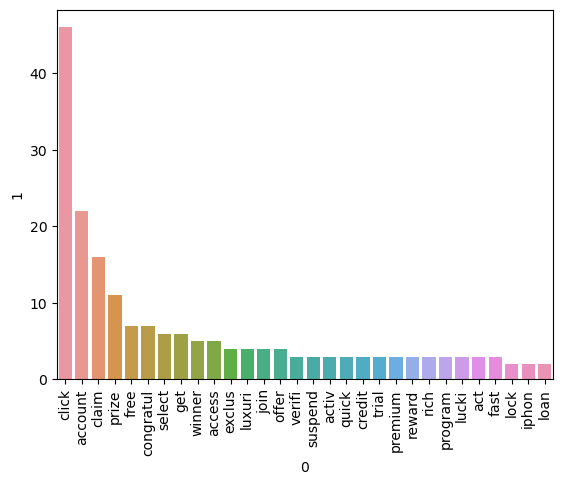

In [45]:
from collections import Counter
# Assuming spam_corpus contains your text data
# Replace spam_corpus with your actual variable

# Create a Counter object to count the occurrences of each word
word_counter = Counter(spam_corpus)

# Get the most common 30 words and convert them into a DataFrame
common_words_df = pd.DataFrame(word_counter.most_common(30))

# Create a bar plot using seaborn
sns.barplot(x=common_words_df[0], y=common_words_df[1])

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [46]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)


704

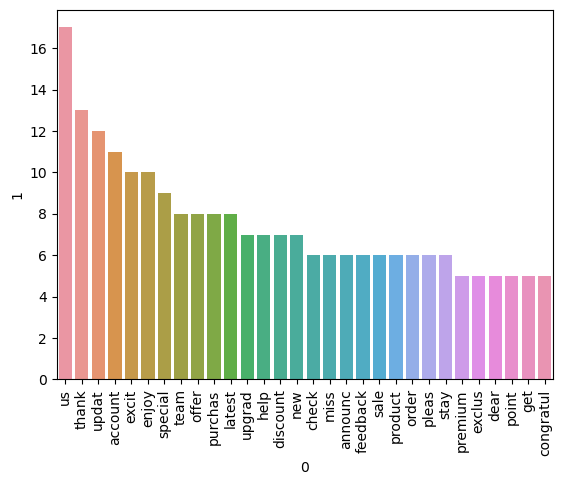

In [48]:
# Assuming ham_corpus contains your text data
# Replace ham_corpus with your actual variable

# Create a Counter object to count the occurrences of each word
word_counter = Counter(ham_corpus)

# Get the most common 30 words and convert them into a DataFrame
common_words_df = pd.DataFrame(word_counter.most_common(30))

# Create a bar plot using seaborn
sns.barplot(x=common_words_df[0], y=common_words_df[1])

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [49]:
# Text Vectorization
# using Bag of Words
df.head()

,email,label,num_characters,num_words,num_sentences,transformed_text
0,Upgrade to our premium plan for exclusive acce...,0,81,14,1,upgrad premium plan exclus access premium cont...
1,Happy holidays from our team! Wishing you joy ...,0,73,14,2,happi holiday team wish joy prosper season
2,We're hiring! Check out our career opportuniti...,0,75,15,2,hire check career opportun join dynam team
3,Your Amazon account has been locked. Click her...,1,83,15,2,amazon account lock click verifi account inform
4,Your opinion matters! Take our survey and help...,0,74,14,2,opinion matter take survey help us enhanc experi


# MODEL BUILDING

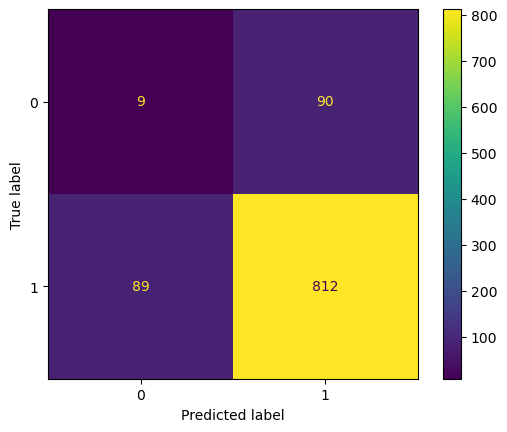

In [50]:
#randomly generating binary actual and predicted values, constructs a confusion matrix, and then displays it using scikit-learn's ConfusionMatrixDisplay class.
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [52]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [53]:
X.shape


(150, 374)

In [54]:
y = df['label'].values

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC  # Example classifier, replace with your actual classifier

# Assuming you have X_train, X_test, y_train, y_test from train_test_split
# Initialize your classifier (replace SVC with your actual classifier)
clf = SVC()

# Train your classifier on the training data
clf.fit(X_train, y_train)

# Obtain predictions on the test set
y_pred = clf.predict(X_test)

# Calculate true labels (assuming you have them)
y_true = y_test  # Assuming y_test contains true labels for the test set

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract true negatives (TN) and false positives (FP) from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)


Accuracy: 0.7666666666666667
Precision: 1.0
Recall: 0.5333333333333333
F1 Score: 0.6956521739130436
Specificity: 1.0


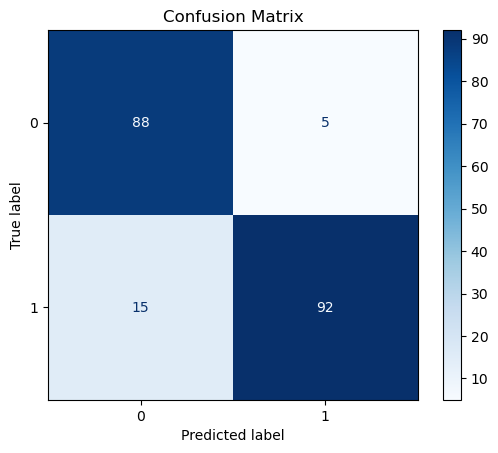

True Negatives (TN): 88
False Positives (FP): 5
False Negatives (FN): 15
True Positives (TP): 92


In [62]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f'True Negatives (TN): {tn}')
print(f'False Positives (FP): {fp}')
print(f'False Negatives (FN): {fn}')
print(f'True Positives (TP): {tp}')

In [63]:
# Given values

# TN = 88   True Negatives
# FP = 5    False Positives
# FN = 15   False Negatives
# TP = 92   True Positives

# Calculate accuracy
# accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
# precision = TP / (TP + FP)

# Calculate recall
# recall = TP / (TP + FN)

# Calculate specificity
# specificity = TN / (TN + FP)

# Calculate F1 Score
# f1_score = 2 * (precision * recall) / (precision + recall)

# The results:
# Accuracy = 0.9
# Precision = 0.948
# Recall = 0.860
# Specificity = 0.946
# F1 Score = 0.903

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.795
[[84  9]
 [32 75]]
0.8928571428571429


In [67]:
# Check for negative values
print("Negative values in X_train:", np.any(X_train < 0))
print("Negative values in X_test:", np.any(X_test < 0))

# If you find negative values and decide to set them to zero
X_train[X_train < 0] = 0
X_test[X_test < 0] = 0

# Train the MultinomialNB classifier again
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


Negative values in X_train: True
Negative values in X_test: True
0.805
[[84  9]
 [30 77]]
0.8953488372093024


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.805
[[84  9]
 [30 77]]
0.8953488372093024


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.805
[[84  9]
 [30 77]]
0.8953488372093024


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.595, 0.6140350877192983)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.595
Precision -  0.6140350877192983
For  KN
Accuracy -  0.805
Precision -  0.8953488372093024
For  NB
Accuracy -  0.805
Precision -  0.8953488372093024
For  DT
Accuracy -  0.865
Precision -  0.9545454545454546
For  LR
Accuracy -  0.86
Precision -  0.9072164948453608
For  RF
Accuracy -  0.855
Precision -  0.9431818181818182
For  AdaBoost
Accuracy -  0.83
Precision -  0.8924731182795699
For  BgC
Accuracy -  0.875
Precision -  0.9555555555555556
For  ETC
Accuracy -  0.875
Precision -  0.9456521739130435
For  GBDT
Accuracy -  0.86
Precision -  0.9157894736842105
For  xgb
Accuracy -  0.85
Precision -  0.8969072164948454


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
7,BgC,0.875,0.955556
3,DT,0.865,0.954545
8,ETC,0.875,0.945652
5,RF,0.855,0.943182
9,GBDT,0.860,0.915789
4,LR,0.860,0.907216
10,xgb,0.850,0.896907
1,KN,0.805,0.895349
2,NB,0.805,0.895349
6,AdaBoost,0.830,0.892473


In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,BgC,Accuracy,0.875000
1,DT,Accuracy,0.865000
2,ETC,Accuracy,0.875000
3,RF,Accuracy,0.855000
4,GBDT,Accuracy,0.860000
5,LR,Accuracy,0.860000
6,xgb,Accuracy,0.850000
7,KN,Accuracy,0.805000
8,NB,Accuracy,0.805000
9,AdaBoost,Accuracy,0.830000


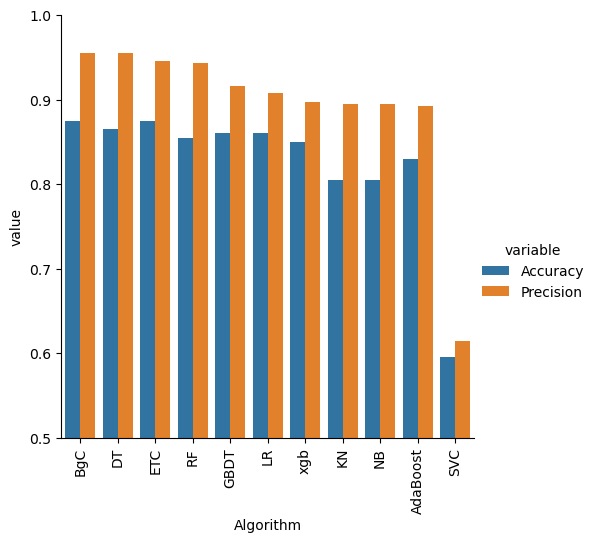

In [81]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [85]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,BgC,0.875,0.955556,0.875,0.955556,0.875,0.955556,0.875,0.955556
1,DT,0.865,0.954545,0.865,0.954545,0.865,0.954545,0.865,0.954545
2,ETC,0.875,0.945652,0.875,0.945652,0.875,0.945652,0.875,0.945652
3,RF,0.855,0.943182,0.855,0.943182,0.855,0.943182,0.855,0.943182
4,GBDT,0.860,0.915789,0.860,0.915789,0.860,0.915789,0.860,0.915789
5,LR,0.860,0.907216,0.860,0.907216,0.860,0.907216,0.860,0.907216
6,xgb,0.850,0.896907,0.850,0.896907,0.850,0.896907,0.850,0.896907
7,KN,0.805,0.895349,0.805,0.895349,0.805,0.895349,0.805,0.895349
8,NB,0.805,0.895349,0.805,0.895349,0.805,0.895349,0.805,0.895349
9,AdaBoost,0.830,0.892473,0.830,0.892473,0.830,0.892473,0.830,0.892473


In [89]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [91]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.84
Precision 0.9120879120879121


In [93]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier

In [95]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [96]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.835
Precision 0.8936170212765957


In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [100]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1","Sample text 2","Sample text 3"]
y_train = [0,1,0]

tfidf = TfidfVectorizer(lowercase=True,stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)
    
with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)